# Feature Engenering

### Import des modules

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import joblib
from scipy import stats

In [13]:
df = joblib.load("df.joblib")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   age                                        1407 non-null   int64   
 1   genre                                      1407 non-null   object  
 2   revenu_mensuel                             1407 non-null   int64   
 3   statut_marital                             1407 non-null   object  
 4   departement                                1407 non-null   object  
 5   poste                                      1407 non-null   object  
 6   nombre_experiences_precedentes             1407 non-null   int64   
 7   annee_experience_totale                    1407 non-null   int64   
 8   annees_dans_l_entreprise                   1407 non-null   int64   
 9   annees_dans_le_poste_actuel                1407 non-null   int64   
 10  a_quitte_l_entrep

In [14]:
def safe_div(a, b): 
    return np.where(b==0, 0, a/b)

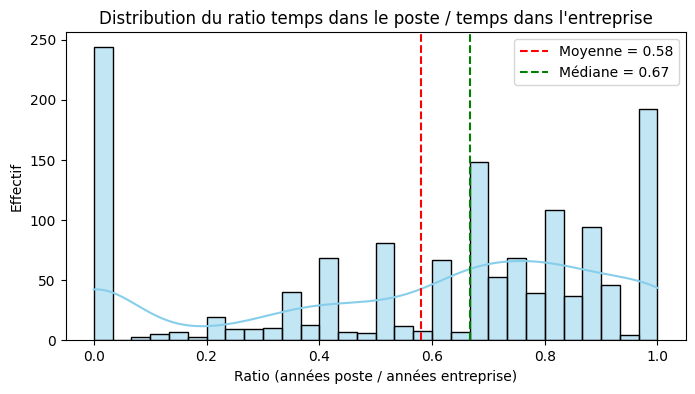

In [15]:
df['ratio_post_stab'] = safe_div(df['annees_dans_le_poste_actuel'], df['annees_dans_l_entreprise']) 


plt.figure(figsize=(8,4))
sns.histplot(df['ratio_post_stab'], bins=30, kde=True, color="skyblue")
plt.axvline(df['ratio_post_stab'].mean(), color="red", linestyle="--", label=f"Moyenne = {df['ratio_post_stab'].mean():.2f}")
plt.axvline(df['ratio_post_stab'].median(), color="green", linestyle="--", label=f"Médiane = {df['ratio_post_stab'].median():.2f}")
plt.title("Distribution du ratio temps dans le poste / temps dans l'entreprise")
plt.xlabel("Ratio (années poste / années entreprise)")
plt.ylabel("Effectif")
plt.legend()
plt.show()

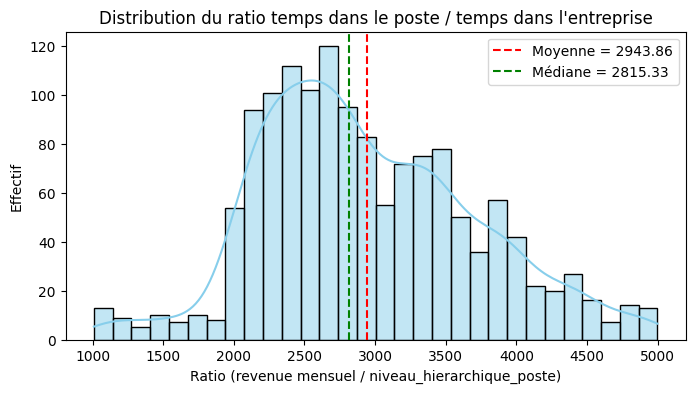

In [16]:
df['revenu_par_niveau'] = safe_div(df['revenu_mensuel'], df['niveau_hierarchique_poste'].replace(0, np.nan))

plt.figure(figsize=(8,4))
sns.histplot(df['revenu_par_niveau'], bins=30, kde=True, color="skyblue")
plt.axvline(df['revenu_par_niveau'].mean(), color="red", linestyle="--", label=f"Moyenne = {df['revenu_par_niveau'].mean():.2f}")
plt.axvline(df['revenu_par_niveau'].median(), color="green", linestyle="--", label=f"Médiane = {df['revenu_par_niveau'].median():.2f}")
plt.title("Distribution du ratio temps dans le poste / temps dans l'entreprise")
plt.xlabel("Ratio (revenue mensuel / niveau_hierarchique_poste)")
plt.ylabel("Effectif")
plt.legend()
plt.show()

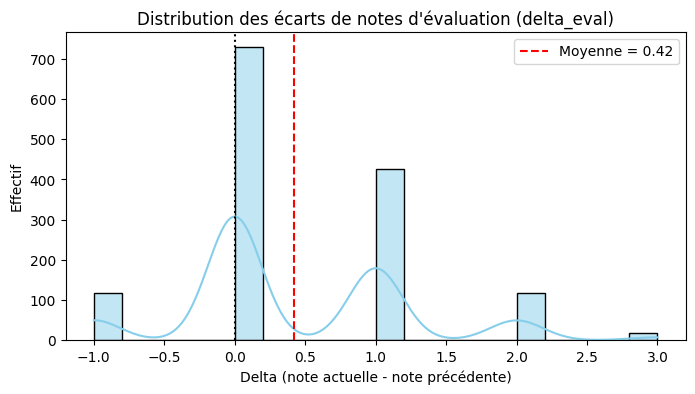

In [17]:
df['delta_eval'] = df['note_evaluation_actuelle'] - df['note_evaluation_precedente']
plt.figure(figsize=(8,4))
sns.histplot(df['delta_eval'], bins=20, kde=True, color="skyblue")
plt.axvline(df['delta_eval'].mean(), color="red", linestyle="--", label=f"Moyenne = {df['delta_eval'].mean():.2f}")
plt.axvline(0, color="black", linestyle=":") 
plt.title("Distribution des écarts de notes d'évaluation (delta_eval)")
plt.xlabel("Delta (note actuelle - note précédente)")
plt.ylabel("Effectif")
plt.legend()
plt.show()

In [18]:
sat_cols = [
    'satisfaction_employee_environnement',
    'satisfaction_employee_nature_travail',
    'satisfaction_employee_equipe',
    'satisfaction_employee_equilibre_pro_perso'
]
df['sat_mean'] = df[sat_cols].mean(axis=1)
df['sat_std']  = df[sat_cols].std(axis=1)

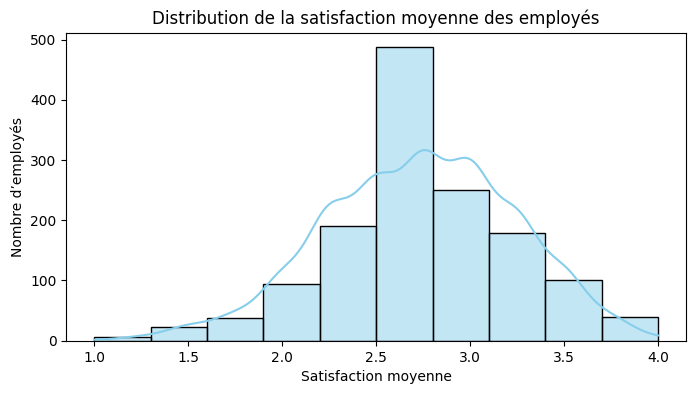

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df['sat_mean'], bins=10, kde=True, color="skyblue")
plt.title("Distribution de la satisfaction moyenne des employés")
plt.xlabel("Satisfaction moyenne")
plt.ylabel("Nombre d’employés")
plt.show()


/tmp/ipykernel_2388913/3338083500.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proba_depart_sat = df.groupby('tranche_sat_mean')['a_quitte_l_entreprise'].mean()
/tmp/ipykernel_2388913/3338083500.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proba_depart_sat.index, y=proba_depart_sat.values, palette="coolwarm")


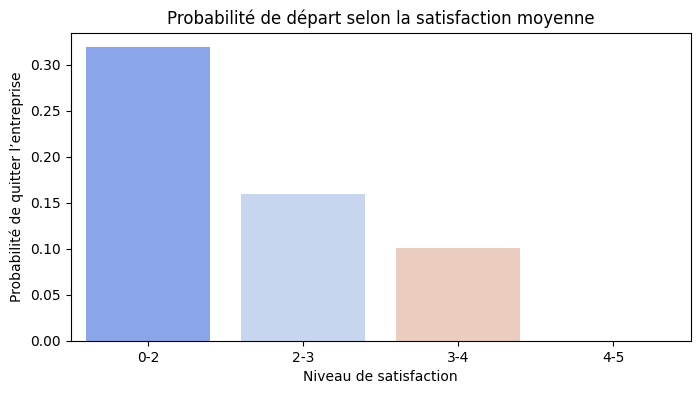

In [20]:
bins   = [0, 2, 3, 4, 5]
labels = ['0-2', '2-3', '3-4', '4-5']

df['tranche_sat_mean'] = pd.cut(df['sat_mean'], bins=bins, labels=labels, include_lowest=True)

proba_depart_sat = df.groupby('tranche_sat_mean')['a_quitte_l_entreprise'].mean()

plt.figure(figsize=(8,4))
sns.barplot(x=proba_depart_sat.index, y=proba_depart_sat.values, palette="coolwarm")
plt.title("Probabilité de départ selon la satisfaction moyenne")
plt.ylabel("Probabilité de quitter l’entreprise")
plt.xlabel("Niveau de satisfaction")
plt.show()


In [ ]:
# Drop colonne innutiles

cols_to_drop = [
    'age', 
    'revenu_mensuel', 
    'distance_domicile_travail', 
]

df = df.drop(columns=cols_to_drop)


In [22]:
joblib.dump(df, "df.joblib")

['df.joblib']